<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 194 (delta 48), reused 35 (delta 11), pack-reused 89
Receiving objects: 100% (194/194), 14.79 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/SRU-deeplearning-workshop


# CNN Architecture

In [2]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = Sequential()

# in 1D input > model.add(Dense(64, activation='relu', input_dim=25))
# in images > we use Conv > input_shape > must be 3 dims
# num of filters, (3*3)*number of input channels
# consider we have images with the shape of 28*28*1

# padding > "valid" as default
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))

# strides: Integer, tuple of 2 integers, or None. default: None
# If None, it will default to pool_size. > stride=(1,1) / (2,2)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
'''
layer input > 28*28*1
out conv > 
out > 26*26*32
params > 3*3*1*32 +32 = 320
out max pool >
out > 13*13*32
it deosn't have any training params
second conv>
out > 11*11*64
params > 3*3*32*64 + 64 = 18496
second pool>
out > 5*5*64
third conv > 
out > 3*3*64
params > 3*3*64*64 + 64 = 36928
flatten > 576 neurons
dense 64 > params = 576*64 + 64 = 36928
dropout > nothing!!!!
dense 10 > params = 64*10 + 10 = 650
'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## CNN on Hoda Dataset


In [5]:
from dataset import load_hoda

In [6]:
np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [7]:
print(type(x_train_original))
print(x_train_original.shape)
print(x_train_original.dtype)
print(x_train_original.min(), x_train_original.max())

<class 'numpy.ndarray'>
(3500, 784)
uint8
0 255


In [15]:
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(type(x_train))
print(x_train.shape)
print(x_train.dtype)
print(x_train.min(), x_train.max())

<class 'numpy.ndarray'>
(3500, 784)
float32
0.0 1.0


In [16]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape)

(3500, 28, 28, 1)


In [17]:
print(y_train_original.shape)

y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

print(y_train.shape)

(3500,)
(3500, 10)


In [18]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [19]:
# Define model architectur
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
# Compile model
'''
Model.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
'''
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# Fit model on training data
'''
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0, # use train dataset
    validation_data=None, # tuple of (x_val, y_val)
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)'''

# 3500 train data , batch_size=256 > 13.67 > 14 iterations in each epoch

history = model.fit(x_train, y_train,
          epochs=100, batch_size=256, validation_data = (x_val, y_val))

Epoch 1/100
14/14 [==============================] - 2s 25ms/step - loss: 2.0369 - accuracy: 0.3714 - val_loss: 1.3039 - val_accuracy: 0.7250
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 1.1455 - accuracy: 0.6220 - val_loss: 0.5387 - val_accuracy: 0.8350
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.7761 - accuracy: 0.7423 - val_loss: 0.3202 - val_accuracy: 0.9150
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.5680 - accuracy: 0.8091 - val_loss: 0.2509 - val_accuracy: 0.9150
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.4793 - accuracy: 0.8369 - val_loss: 0.2016 - val_accuracy: 0.9250
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.4156 - accuracy: 0.8586 - val_loss: 0.1824 - val_accuracy: 0.9400
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.3451 - accuracy: 0.8869 - val_loss: 0.1585 - val_accuracy: 0.9500
Epoch 

In [22]:
print(type(history.history))
print(history.history.keys())
print(len(history.history['loss']))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
100


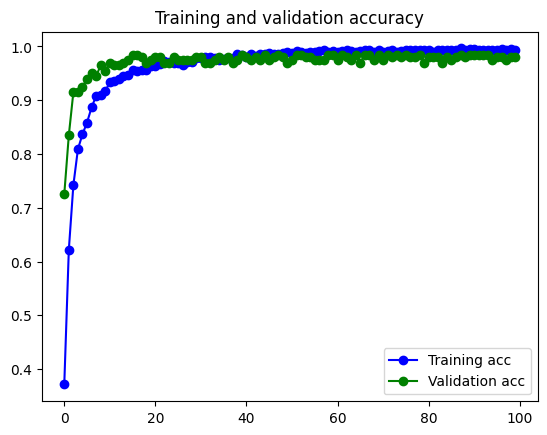

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(len(acc))

plt.plot(epochs, acc, "b-o", label="Training acc")
plt.plot(epochs, val_acc, "g-o", label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

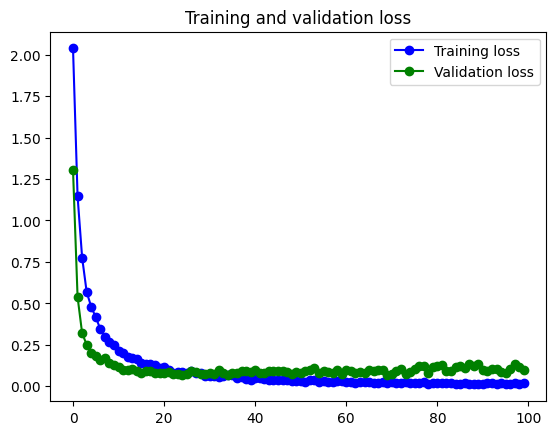

In [24]:
plt.plot(epochs, loss, 'b-o', label='Training loss')
plt.plot(epochs, val_loss, 'g-o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()